# Data Visualizations 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# make a figure plotting letters against number of occurances in selftext for each selftext length bin. To avoid the ValueError "ValueError: num must be 1 <= num <= 16, not 17" the number of bins is set to 25 instead of 26 (the number of letters in the alphabet).
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, letter in enumerate('abcdefghijklmnopqrstuvwxyz'):
    try:
        ax = axes[i//5, i%5]
        ax.scatter(df['selftext_length'], df[f'{letter}'], alpha=0.5)
        ax.set_title(letter)
        ax.set_xlabel('Number of Occurances')
        ax.set_ylabel('Selftext Length')
    except IndexError:
        pass
fig.suptitle('Letter Occurances in Selftext by Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/letter_histograms.png')
plt.show();


In [ ]:
block_active = True # set to False to hide code
# plot the selftext length values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the target value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 0 show the text 'OCD' and for 1 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.
# make the background color of each plot correspond to the selftext length value for that author in the `selftext` column (this is the average length of the selftext string for all of the posts by that author) use the following color map: 'coolwarm' (this is the same color map used for the scatterplots)
# make the background color of the plot lighter if the average selftext length value is closer to 0 and darker if the average selftext length value is closer to 1
# use standard scaler on the selftext length values to make the values between 0 and 1
# scaling the selftext length values
if block_active:
    fig = plt.figure(figsize=(20, 20))
    gs = fig.add_gridspec(10, 10)
    gs.update(wspace=0.5, hspace=0.5) # set the spacing between axes
    for i, author in enumerate(df['author'].value_counts().head(100).index):
        ax = fig.add_subplot(gs[i//10, i%10])
        df[df['author'] == author].plot.scatter(x='created_utc', y='selftext_length', c='target', colormap='viridis', ax=ax)
        ax.set_title(author, fontsize=9)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.annotate('autism' if df[df['author'] == author]['target'].values[0] == 0 else 'ocd', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='top', fontsize=10, fontweight='bold', alpha = 0.5) # add the annotation to the plot

        ax.patch.set_alpha(0.5)
        ax.set_facecolor((1, 1, 1, (1 + df[df['author'] == author]['selftext_length'].mean())/2))
        ax.patch.set_facecolor((1, 1, 1, (1 + df[df['author'] == author]['selftext_length'].mean())/2))
    plt.show();



In [ ]:
# plot the sentiment values for the top 25 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:25]):
    try:
        ax = axes[i//5, i%5]
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author.png')
plt.show();

In [ ]:
# plot the sentiment values for the top 25 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
# fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:25]):
    try:
        ax = axes[i//5, i%5]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            ax.text(0.5, 0.5, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, fontweight='bold')
        else:
            ax.text(0.5, 0.5, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, fontweight='bold')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author_with_target.png')
plt.show();

In [ ]:
# plot the sentiment values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.

fig, axes = plt.subplots(10, 10, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:100]):
    try:
        ax = axes[i//10, i%10]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            # align text horizontally at the center of the plot and vertically at the top of the plot
            ax.text(0.5, 0.9, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        else:
            ax.text(0.5, 0.9, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author_with_target_100.png')
plt.show();

In [ ]:
# plot the sentiment values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.
# make the background color of each plot correspond to the average sentiment value for that author in the `sentiment` column (this is the average sentiment value for all of the posts by that author) use the following color map: 'coolwarm' (this is the same color map used for the scatterplots)
# make the background color of the plot lighter if the average sentiment value is closer to 0 and darker if the average sentiment value is closer to 1

fig, axes = plt.subplots(10, 10, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:100]):
    try:
        ax = axes[i//10, i%10]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='viridis', alpha=0.5)
        # add a colorbar to the plot and label it 'Sentiment' (this is the sentiment column in the df)
        ax.set_title(author)
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            # align text horizontally at the center of the plot and vertically at the top of the plot
            ax.text(0.5, 0.9, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        else:
            ax.text(0.5, 0.9, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        ax.set_facecolor(plt.cm.coolwarm(df[df['author']==author]['sentiment'].mean()))
        # colorbar
        # label
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
# add a legend
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();

In [ ]:
# plot selftext length vs created UTC on one scatterplot
# color - the author
# size - number of posts by that author (total number of posts in the df)
df['posts_by_author'] = df['author'].map(df['author'].value_counts()) # add a column to the df that shows the number of posts by each author
# give each author a random unique hex color code i.e. '#aabbcc' for the first author, '#ffe111' for the second author, etc. (this will be used for the color of the points on the scatterplot)
# use the following color map: 'coolwarm'
import random # this is used to generate random hex color codes
def random_color():
    return '#%06x' % random.randint(0, 0xFFFFFF) # this will generate a random hex color code
df['author_color'] = df['author'].map({author: random_color() for author in df['author'].unique()}) # add a column to the df that shows the color for each author

# sample
df.head()

In [ ]:
# plot selftext length vs created UTC on one scatterplot
# color - author_color column (a hex color code for each author)
# size - number of posts by that author (total number of posts in the df)
df['posts_by_author'] = df['author'].map(df['author'].value_counts()) # add a column to the df that shows the number of posts by each author
# alpha - the sentiment value for that post (this is the sentiment column in the df)
# make the size of each point correspond to the number of posts by that author (this is the total number of posts in the df)
# make the alpha of each point correspond to the sentiment value for that post (this is the sentiment column in the df)
# do not add a colorbar to the plot
# add a legend to the plot
# add a title to the plot
# add a label to the x-axis
# add a label to the y-axis

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'])
plt.title('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20)
plt.xlabel('Created UTC', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.ylabel('Selftext Length', fontsize=15)
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();


In [ ]:

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'])
plt.title('Length of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
# annotate the plot with the notation "size denotes post volume by author" (place this annotation in the bottom right corner of the plot)
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();

In [ ]:
# repeat the plot above but add two horizontal lines to the plot that show:
# 1. the average selftext length for the OCD and Autism subreddits (together) - black line
# 2. the median selftext length for the OCD and Autism subreddits (together) - red line
# also, keep colors the same as before but fade them by 0.5 (i.e. make them 50% transparent) so that the lines are more visible

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 10. Distribution of post lengths in both subreddits\n Identifying outliers', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
mean_val_preoutlier_removal = df['selftext_length'].mean()
median_val_preoutlier_removal = df['selftext_length'].median()
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length')
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length')
plt.legend()
plt.savefig('../images/figure_10.png')
plt.show();

In [ ]:
# repeat the plot above (using seaborn) but add a density plot to the plot that shows the distribution of selftext length for the OCD and Autism subreddits (together) - orange filled area (use matplotlib) - this will be the background of the plot (i.e. the density plot will be the background of the plot) - make the density plot transparent by 0.5 (i.e. make it 50% transparent) so that the points are more visible - make the density plot have a black outline

import seaborn as sns
sns.set(style="whitegrid")
# set the area of the plot to focus on the data (i.e. remove the whitespace around the data)
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the size of the plot to 20 inches by 10 inches

# add 'ocd_selftext_length' and 'autism_selftext_length' columns to the df
df['ocd_selftext_length'] = df[df['target']==1]['selftext_length']
df['autism_selftext_length'] = df[df['target']==0]['selftext_length']




fig = sns.kdeplot(df['ocd_selftext_length'], shade=True, color='red', alpha=0.5)
fig = sns.kdeplot(df['autism_selftext_length'], shade=True, color='blue', alpha=0.5)
plt.title('Figure 11. Distribution of post lengths in both subreddits\n Identifying outliers', fontsize=15)
plt.xlabel('Selftext Length', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.show();





In [ ]:
IQR = df['selftext_length'].quantile(0.75) - df['selftext_length'].quantile(0.25) # calculate the interquartile range
lower_bound = df['selftext_length'].quantile(0.25) - (1.5 * IQR) # calculate the lower bound
upper_bound = df['selftext_length'].quantile(0.75) + (1.5 * IQR) # calculate the upper bound
print(f'lower bound: {lower_bound} characters in selftext')
print(f'upper bound: {upper_bound} characters in selftext')

# remove outliers from the df
print(f'number of rows in df before removing outliers: {df.shape[0]}')
preshape = df.shape[0]
df = df[(df['selftext_length'] > lower_bound) & (df['selftext_length'] < upper_bound)]
print(f'number of rows in df after removing outliers: {df.shape[0]}')
print(f'number of rows removed: {preshape - df.shape[0]}')
outliers_removed = preshape - df.shape[0]


In [ ]:
# repeat the plot above (using seaborn) but add a density plot to the plot that shows the distribution of selftext length for the OCD and Autism subreddits (together) - orange filled area (use matplotlib) - this will be the background of the plot (i.e. the density plot will be the background of the plot) - make the density plot transparent by 0.5 (i.e. make it 50% transparent) so that the points are more visible - make the density plot have a black outline

import seaborn as sns
sns.set(style="whitegrid")
# set the area of the plot to focus on the data (i.e. remove the whitespace around the data)
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the size of the plot to 20 inches by 10 inches

# add 'ocd_selftext_length' and 'autism_selftext_length' columns to the df
df['ocd_selftext_length'] = df[df['target']==1]['selftext_length']
df['autism_selftext_length'] = df[df['target']==0]['selftext_length']




fig = sns.kdeplot(df['ocd_selftext_length'], shade=True, color='red', alpha=0.5)
fig = sns.kdeplot(df['autism_selftext_length'], shade=True, color='blue', alpha=0.5)
plt.title('Figure 12. Density Distribution of the Subreddits\n Outliers Removed', fontsize=15)
# annotate with outlier removal information in top right corner
plt.annotate(f'{outliers_removed} outliers removed', xy=(0.95, 0.95), xycoords='axes fraction', horizontalalignment='right', verticalalignment='top', fontsize=10)
plt.xlabel('Selftext Length', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
# save the figure
plt.savefig('../images/figure_12.png')
plt.show();





In [ ]:
# repeat the plot above but add two horizontal lines to the plot that show:
# 1. the average selftext length for the OCD and Autism subreddits (together) - black line
# 2. the median selftext length for the OCD and Autism subreddits (together) - red line
# also, keep colors the same as before but fade them by 0.5 (i.e. make them 50% transparent) so that the lines are more visible

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 13. Distribution of post lengths in both subreddits\n After removing outliers', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length') # using the previously calculated mean value of the selftext length
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length') # using the previously calculated median value of the selftext length
plt.legend()
plt.savefig('../images/figure_13.png')
plt.show();

In [ ]:
df.head()

In [ ]:
df.describe()

In [15]:
data = pd.read_csv('../data/master_results_dataframe.csv') # read in the data
data.head() # view the first 5 rows of the data


,model,accuracy,precision,recall,f1,auc,cross_val_score,rmse,mae,r2,mse,time,train_score,test_score,best_params,residuals,accuracy_score,best_score
0,logisticregression,NaN,0.932251,0.940147,0.936182,0.888095,0.909517,0.300789,0.090474,0.564236,0.090474,NaN,0.963627,0.909526,NaN,3128 0\n1839 1\n1327 0\n11334 0...,0.909526,NaN
1,adaboostclassifier,NaN,0.902823,0.939018,0.920565,0.848235,0.892277,0.338213,0.114388,0.449056,0.114388,NaN,0.902143,0.885612,NaN,3128 0\n1839 1\n1327 0\n11334 0...,0.885612,NaN
2,gradientboostingclassifier,NaN,0.866899,0.981931,0.920837,0.810071,0.884504,0.345212,0.119171,0.426020,0.119171,NaN,0.899053,0.880829,NaN,3128 0\n1839 0\n1327 0\n11334 -1...,0.880829,NaN
3,randomforestclassifier,NaN,0.877406,0.977979,0.924967,0.825033,0.902143,0.334659,0.111997,0.460574,0.111997,NaN,1.000000,0.888003,NaN,3128 0\n1839 0\n1327 0\n11334 -1...,0.888003,NaN
4,gaussiannb,NaN,0.960705,0.800678,0.873422,0.861043,0.826009,0.404735,0.163810,0.211017,0.163810,NaN,0.832885,0.836190,NaN,3128 0\n1839 1\n1327 0\n11334 0...,0.836190,NaN


/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_72387/2288964286.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


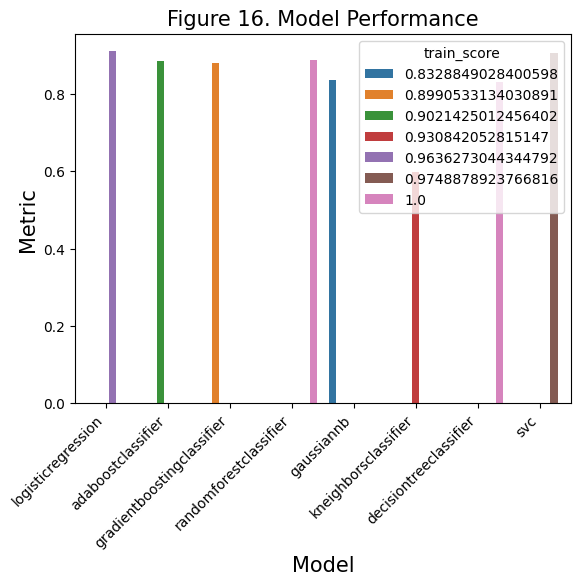

In [141]:
# plot a histogram of the model performance with each metric in a new color
# set the size of the plot to 20 inches by 10 inches
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the title of the plot to 'Figure 16. Model Performance'
# set the x-axis label to 'Model'
# set the y-axis label to 'Metric'
# set the x-axis tick labels to the model names
# set the x-axis tick label font size to 10
# set the y-axis tick label font size to 10
import matplotlib.pyplot as plt
import seaborn as sns

sns_plot = sns.barplot(x='model', y='test_score', hue='train_score', data=data)
sns_plot.set_title('Figure 16. Model Performance', fontsize=15)
sns_plot.set_xlabel('Model', fontsize=15)
sns_plot.set_ylabel('Metric', fontsize=15)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=10)
plt.savefig('../images/figure_16.png')
plt.show();


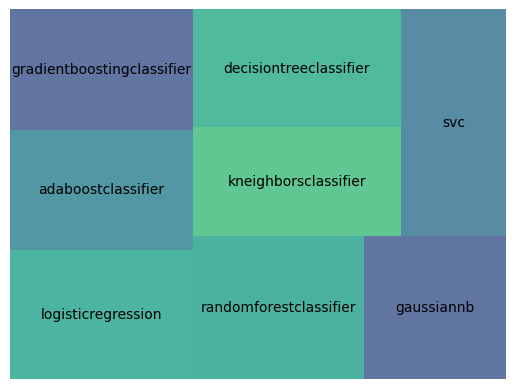

In [142]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd
# plot it
squarify.plot(sizes=data['train_score'], label=df['model'], alpha=.8 )
plt.suptitle('Figure 17. Train Score', fontsize=15)
plt.axis('off')
plt.show()

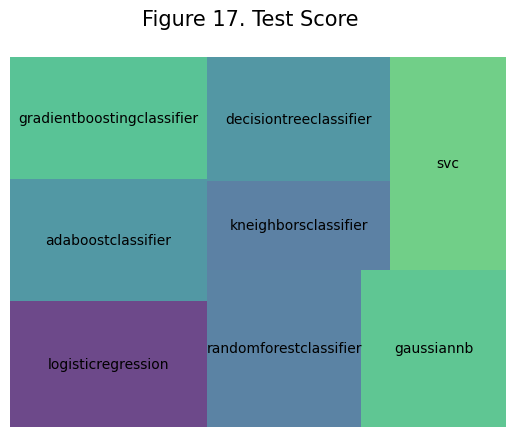

In [143]:
squarify.plot(sizes=data['test_score'], label=df['model'], alpha=.8 )
plt.suptitle('Figure 17. Test Score', fontsize=15)
plt.axis('off')
plt.show()

# Comparing Models with Plot9

In [18]:
import pandas as pd
import pandas.api.types as pdtypes
import numpy as np

from plotnine import *
from plydata import *

data = pd.read_csv('../data/master_results_dataframe.csv') # read in the data
print(data.columns)
# the similar columns are: cross_val_score, rmse, mae, r2, mse, train_score, test_score, and accuracy_score.
data = data[['model','cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']] # select only the columns that we want to use
data.head() # view the first 5 rows of the data


Index(['model', 'accuracy', 'precision', 'recall', 'f1', 'auc',
       'cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'time', 'train_score',
       'test_score', 'best_params', 'residuals', 'accuracy_score',
       'best_score'],
      dtype='object')


,model,cross_val_score,rmse,mae,r2,mse,train_score,test_score,accuracy_score
0,logisticregression,0.909517,0.300789,0.090474,0.564236,0.090474,0.963627,0.909526,0.909526
1,adaboostclassifier,0.892277,0.338213,0.114388,0.449056,0.114388,0.902143,0.885612,0.885612
2,gradientboostingclassifier,0.884504,0.345212,0.119171,0.426020,0.119171,0.899053,0.880829,0.880829
3,randomforestclassifier,0.902143,0.334659,0.111997,0.460574,0.111997,1.000000,0.888003,0.888003
4,gaussiannb,0.826009,0.404735,0.163810,0.211017,0.163810,0.832885,0.836190,0.836190


In [24]:
point_data = data.melt(id_vars=['model'], var_name='metric', value_name='value') # melt the data
point_data.head() # view the first 5 rows of the data
    
n = 5 # number of models to show


In [32]:
X = data[['model','cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']] # select the columns that we want to use for the X variable

segment_data = X.melt(id_vars=['model'], var_name='metric', value_name='value') # melt the data
segment_data.head() # view the first 5 rows of the data

#percent_format = lambda x: f'{x:.0%}' # create a function that formats the values as percentages
# percent_format must have the same length as range(0, 101, 10), otherwise the plot will not work
percent_format = lambda x: f'{x:.0%}' # create a function that formats the values as percentages
percent_formats = [percent_format(x) for x in range(0, 101, 10)] # create a list of the formatted values

# The right column (youngest-oldest gap) location
xgap = 112

# Gallery Plot

(ggplot()
 # Background Strips                                     # new
 + geom_segment(
     segment_data,
     aes(y='country', yend='country'),
     x=0, xend=100,
     size=8.5,
     color='#edece3'
 )
 # vertical grid lines along the strips                  # new
 + annotate(
     'segment',
     x=list(range(10, 100, 10)) * n,
     xend=list(range(10, 100, 10)) * n,
     y=np.tile(np.arange(1, n+1), 9)-.25,
     yend=np.tile(np.arange(1, n+1), 9) + .25,
     color='#CCCCCC'
 )
 # Range strip
 + geom_segment(
     segment_data,
     aes(x='min', xend='max', y='country', yend='country'),
     size=6,
     color='#a7a9ac'
 )
 # Age group markers
 + geom_point(
     point_data,
     aes('sm_use_percent', 'country', color='age_group', fill='age_group'),
     size=5,
     stroke=0.7,
 )
 # Age group percentages
 + geom_text(
     point_data >> query('age_group=="50+"'),
     aes(x='sm_use_percent-2', y='country', label='sm_use_percent_str', color='age_group'),
     size=8,
     ha='right',
 )
 + geom_text(
     point_data >> query('age_group=="35-49"'),
     aes(x='sm_use_percent+2', y='country', label='sm_use_percent_str'),
     size=8,
     ha='left',
     va='center',
     color='white'
 )
 + geom_text(
     point_data >> query('age_group=="18-34"'),
     aes(x='sm_use_percent+2', y='country', label='sm_use_percent_str', color='age_group'),
     size=8,
     ha='left',
 )
 # countries right-hand-size (instead of y-axis)         # new
 + geom_text(
     segment_data,
     aes(y='country', label='country'),
     x=-1,
     size=8,
     ha='right',
     fontweight='bold',
     color='#222222'
 )
 # gap difference
 + geom_vline(xintercept=xgap, color='#edece3', size=32)  # new
 + geom_text(
     segment_data,
     aes(x=xgap, y='country', label='gap_str'),
     size=9,
     fontweight='bold',
     format_string='+{}'
 )
 # Annotations                                            # new
 + annotate('text', x=31, y=n+1.1, label='50+', size=9, color='#ea9f2f', va='top')
 + annotate('text', x=56, y=n+1.1, label='35-49', size=9, color='#6d6e71', va='top')
 + annotate('text', x=85, y=n+1.1, label='18-34', size=9, color='#939c49', va='top')
 + annotate('text', x=xgap, y=n+.5, label='Youngest-\nOldest Gap', size=9, color='#444444', va='bottom', ha='center')
 + annotate('point', x=[31, 56, 85], y=n+.3, alpha=0.85, stroke=0)
 + annotate('segment', x=[31, 56, 85], xend=[31, 56, 85], y=n+.3, yend=n+.8, alpha=0.85)
 + annotate('hline', yintercept=[x+0.5 for x in range(2, n, 2)], alpha=.5, linetype='dotted', size=0.7)

 # Better spacing and color                              # new
 + scale_x_continuous(limits=(-18, xgap+2))
 + scale_y_discrete(expand=(0, 0, 0.1, 0))
 + scale_fill_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
 + scale_color_manual(values=['#939c49', '#6d6e71', '#ea9f2f'])
 + guides(color=None, fill=None)
 + theme_void()
 + theme(figure_size=(8, 7.5))
)

# create a plot9 plot based on the markdown cell above using the data in the 'X' dataframe.
- each model will be it's row (i.e. each model will be a separate row)
- each metric will fall on the same horizontal axis on that row but will be at the correct distance from the left side of the plot (i.e. 0.90 closer to the right side and 0.10 closer to the left side).
- each model will have a label on the left side of the plot (i.e. the model name). The label will be the same color as the line for that model.
- each metric will be represented by a circle with its color matching the metric color (in the legend) and position along the line (x-axis for the model) matching the metric value.

In [83]:
# creating the plot using plotnine
# set the size of the plot to 20 inches by 10 inches
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the title of the plot to 'Figure 14. Model Performance Metrics'
# set the x-axis label to 'Model'
# set the y-axis label to 'Metric'
# set the x-axis limits to 0 and 1
# set the y-axis limits to 0 and 1
# set the x-axis tick marks to 0.1
# set the y-axis tick marks to 0.1
# set the x-axis tick mark labels to the formatted values in percent_formats
# set the y-axis tick mark labels to the formatted values in percent_formats

# creating the plot
# The plot is made up of two layers: the points and the segments
# The points are the individual values for each model
# The segments are the lines that connect the points
# The segments are created by using the geom_segment() function and the points are created by using the geom_point() function as well.
xgap = 0.1 # set the x-axis gap between the points
ygap = 0.1 # set the y-axis gap between the points
point_size = 1 # set the size of the points
segment_size = 1 # set the size of the segments
point_color = 'black' # set the color of the points
segment_color = 'black' # set the color of the segments
point_alpha = 1 # set the transparency of the points
segment_alpha = 0.5 # set the transparency of the segments
point_shape = 'o' # set the shape of the points
segment_shape = '-' # set the shape of the segments
point_data = data.melt(id_vars=['model'], var_name='metric', value_name='value') # melt the data
segment_data = X.melt(id_vars=['model'], var_name='metric', value_name='value') # melt the data
segment_data['x'] = segment_data['value'] # set the x variable to the value column
segment_data['y'] = segment_data['metric'] # set the y variable to the metric column
# remember, each row is a model, and the metrics fall along a horizontal line (one line) for each model. The colors of the points (metric values) correspond to the colors of the metric they represent (i.e. the color of the point for the cross_val_score metric for logreg is the same color as the point on the line for the KNN model.)
# the segments are created by using the geom_segment() function and the points are created by using the geom_point() function as well.
# create the plot

point_data.head()

,model,metric,value
0,logisticregression,cross_val_score,0.909517
1,adaboostclassifier,cross_val_score,0.892277
2,gradientboostingclassifier,cross_val_score,0.884504
3,randomforestclassifier,cross_val_score,0.902143
4,gaussiannb,cross_val_score,0.826009


To construct a geom_point() layer, we need to create a dataframe with the following columns:

- x: the x-axis position of the point
- y: the y-axis position of the point
- label: the label for the point
- color: the color of the point

We can use the melt() function to convert the X dataframe into a long format dataframe. We will use the id_vars parameter to specify the columns that should not be converted into rows. We will use the value_vars parameter to specify the columns that should be converted into rows.

```python
# create a dataframe with the following columns:
# - x: the x-axis position of the point
# - y: the y-axis position of the point
# - label: the label for the point
# - color: the color of the point

# convert the X dataframe into a long format dataframe
# - use the id_vars parameter to specify the columns that should not be converted into rows
# - use the value_vars parameter to specify the columns that should be converted into rows
# - use the var_name parameter to specify the name of the column that will contain the variable names
# - use the value_name parameter to specify the name of the column that will contain the variable values
# - use the ignore_index parameter to specify that the index should be reset
X_long = X.melt(id_vars=['model'], var_name='metric', value_name='value', ignore_index=True)
```

Now we have a dataframe with the columns we wanted to create. We can use this dataframe to create a plot9 plot.

```python
# create a plot9 plot based on the dataframe we created above
# - each model will be it's row (i.e. each model will be a separate row)
# - each metric will fall on the same horizontal axis on that row but will be at the correct distance from the left side of the plot (i.e. 0.90 closer to the right side and 0.10 closer to the left side).
# - each model will have a label on the left side of the plot (i.e. the model name). The label will be the same color as the line for that model.
# - each metric will be represented by a circle with its color matching the metric color (in the legend) and position along the line (x-axis for the model) matching the metric value.


(ggplot())
```

# create a plot9 plot based on the dataframe we created above
# - each model will be it's row (i.e. each model will be a separate row)
# - each metric will fall on the same horizontal axis on that row but will be at the correct distance from the left side of the plot (i.e. 0.90 closer to the right side and 0.10 closer to the left side).
# - each model will have a label on the left side of the plot (i.e. the model name). The label will be the same color as the line for that model.
# - each metric will be represented by a circle with its color matching the metric color (in the legend) and position along the line (x-axis for the model) matching the metric value.

(ggplot()
 + geom_point(
     X_long,
     aes(x='value', y='model', color='metric'),
     alpha=0.5,
     size=4,
     stroke=0.5,
     shape='o',
 )
 + geom_text(
     X_long >> query('metric=="mae"'),
     aes(x='value', y='model', label='metric'),
     size=8,
     ha='left',
     va='center',
     color='black'
 )
 + geom_text(
     X_long >> query('metric=="mse"'),
     aes(x='value', y='model', label='metric'),
     size=8,
     ha='right',
     va='center',
     color='black'
 )
 + scale_x_log10()
 + scale_y_discrete()
 + scale_color_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
 + guides(color=None)
 + theme_void()
 + theme(figure_size=(8, 7.5))
)

# create a plot9 plot based on the dataframe we created above
# - each model will be it's row (i.e. each model will be a separate row)
# - each metric will fall on the same horizontal axis on that row but will be at the correct distance from the left side of the plot (i.e. 0.90 closer to the right side and 0.10 closer to the left side).
# - each model will have a label on the left side of the plot (i.e. the model name). The label will be the same color as the line


```

The plot9 package is still in development and is not yet available on PyPI. To install it, you will first need to clone the repo and install it using pip.

```bash
# clone the repo
git clone
)
```

In [84]:
# create a dataframe with the following columns:
# - x: the x-axis position of the point
# - y: the y-axis position of the point
# - label: the label for the point
# - color: the color of the point

# convert the X dataframe into a long format dataframe
# - use the id_vars parameter to specify the columns that should not be converted into rows
# - use the value_vars parameter to specify the columns that should be converted into rows
# - use the var_name parameter to specify the name of the column that will contain the variable names
# - use the value_name parameter to specify the name of the column that will contain the variable values
# - use the ignore_index parameter to specify that the index should be reset
X_long = X.melt(id_vars=['model'], var_name='metric', value_name='value', ignore_index=True)

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/envs/master_env_temp/lib/python3.9/site-packages/plotnine/scales/scales.py:36: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/envs/master_env_temp/lib/python3.9/site-packages/plotnine/scales/scales.py:36: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/envs/master_env_temp/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/envs/master_env_temp/lib/python3.9/site-packages/plotnine/scales/scale_manual.py:41: PlotnineWarning: The palette of scale_color_manual can return a maximum of 3 values. 8 were requested from it.
/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/envs/mast

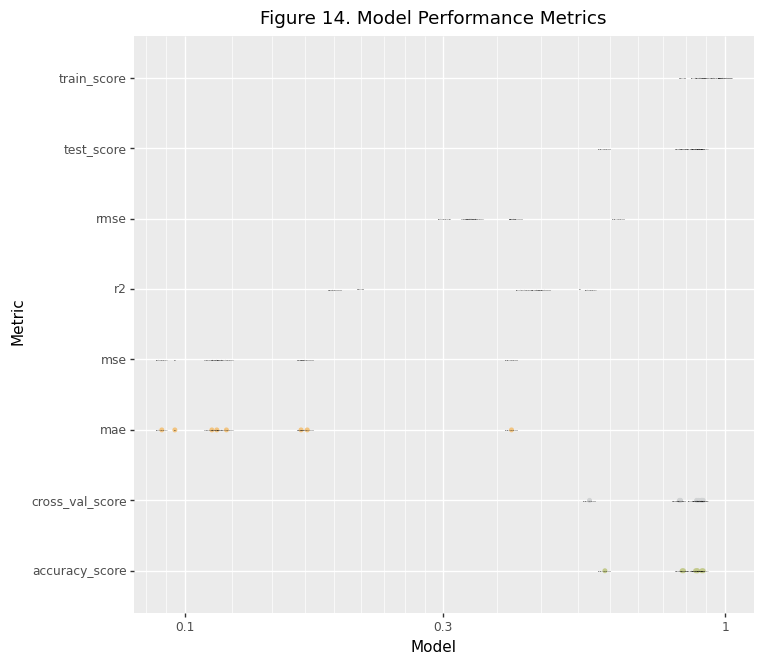

<ggplot: (8766367276593)>

In [85]:
# create a plot9 plot based on the dataframe we created above
# - each model will be it's row (i.e. each model will be a separate row)
# - each metric will fall on the same horizontal axis on that row but will be at the correct distance from the left side of the plot (i.e. 0.90 closer to the right side and 0.10 closer to the left side).
# - each model will have a label on the left side of the plot (i.e. the model name). The label will be the same color as the line for that model.
# - each metric will be represented by a circle with its color matching the metric color (in the legend) and position along the line (x-axis for the model) matching the metric value.

# create a plot9 plot
# - each model will be it's row (i.e. each model will be a separate row)
# - each metric will fall on the same horizontal axis on that row but will be at the correct distance from the left side of the plot (i.e. 0.90 closer to the right side and 0.10 closer to the left side).
# - each model will have a label on the left side of the plot (i.e. the model name). The label will be the same color as the line for that model.
# - each metric will be represented by a circle with its color matching the metric color (in the legend) and position along the line (x-axis for the model) matching the metric value.

metric_colors = {'cross_val_score': '#1f77b4', 'rmse': '#ff7f0e', 'mae': '#2ca02c', 'r2': '#d62728', 'mse': '#9467bd', 'train_score': '#8c564b', 'test_score': '#e377c2', 'accuracy_score': '#7f7f7f'} # create a dictionary that maps the metric names to colors

(ggplot()
    # add segment data
    
    # add point data
    + geom_point(
        data=point_data,
        mapping=aes(x='value', y='metric', color='metric'),
        size=point_size,
        alpha=point_alpha,
        shape=point_shape)
    # add labels
    + geom_text(data=X_long, mapping=aes(x='value', y='metric', label='model'), size=point_size, alpha=point_alpha, color=point_color)
    # add the legend
    # set the background color of the plot to white (i.e. #FFFFFF)
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    # set the style of the plot to whitegrid
    + theme(legend_position='bottom')
    # set the title of the plot to 'Figure 14. Model Performance Metrics'
    + labs(title='Figure 14. Model Performance Metrics')
    # set the x-axis label to 'Model'
    + labs(x='Model')
    # set the y-axis label to 'Metric'
    + labs(y='Metric')
    # set the x-axis limits to 0 and 1
    + xlim(0, 1)
    # set the y-axis limits to 0 and 1
    + ylim(0, 1)
    # set the x-axis tick marks to 0.1
    + scale_x_continuous(breaks=np.arange(0, 1.1, 0.1))
    # set the y-axis tick marks to 0.1
    + scale_y_continuous(breaks=np.arange(0, 1.1, 0.1))
    + scale_x_log10()
    + scale_y_discrete()
    + scale_color_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
    + guides(color=None)
    + theme(figure_size=(8, 7.5))
)


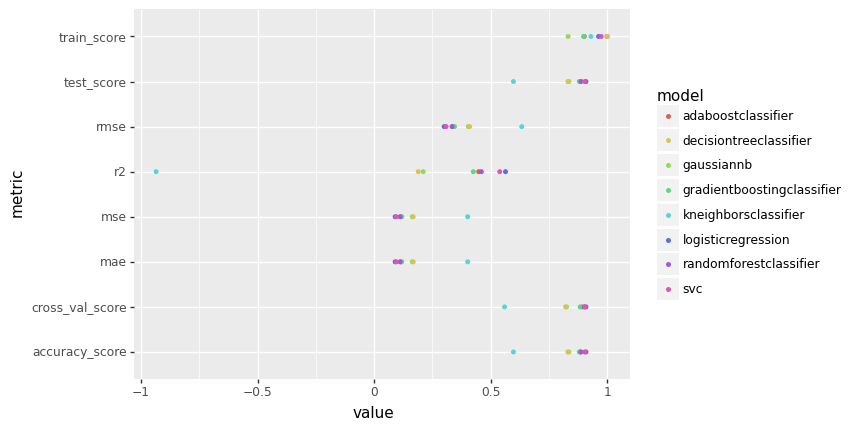

<ggplot: (8766366871977)>

In [86]:
# create a simple ggplot() plot
(ggplot()
+ geom_point(data=point_data, mapping=aes(x='value', y='metric', color='model'), size=point_size, alpha=point_alpha, shape=point_shape)
)

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/envs/master_env_temp/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.
/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/envs/master_env_temp/lib/python3.9/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


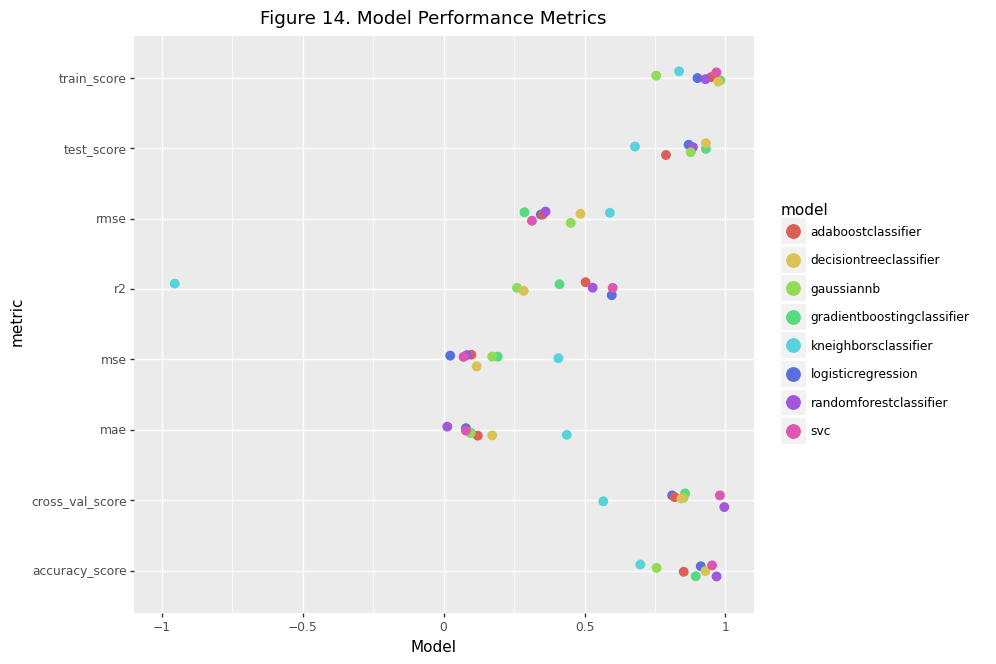

<ggplot: (8766349728160)>

In [116]:
# create a simple ggplot() plot
(ggplot()
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    + labs(title='Figure 14. Model Performance Metrics')
    + labs(x='Model')
    # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
    + geom_jitter(
        data=point_data,
        mapping=aes(x='value', y='metric', color='model'),
        size=3,
        alpha=point_alpha,
        # make the background of the plot white
        shape='o',
        # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
        width=0.1,
        height=0.1
        )
    + scale_x_continuous(limits=(-1, 1))
    + scale_fill_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
    + guides(color = guide_legend(override_aes={'size': 5}))
    + theme(figure_size=(8, 7.5))
) 

# Doing this in Matplotlib or Seaborn instead of plotnine

# the ggplot2 implementation using plotnine is shown below
```
# create a simple ggplot() plot
(ggplot()
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    + labs(title='Figure 14. Model Performance Metrics')
    + labs(x='Model')
    # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
    + geom_jitter(
        data=point_data,
        mapping=aes(x='value', y='metric', color='model'),
        size=3,
        alpha=point_alpha,
        # make the background of the plot white
        shape='o',
        # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
        width=0.1,
        height=0.1
        )
    + scale_x_continuous(limits=(-1, 1))
    + scale_fill_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
    + guides(color = guide_legend(override_aes={'size': 5}))
    + theme(figure_size=(8, 7.5))
) 
```

To make this same plot in Matplotlib or Seaborn, we will need to do a few things differently.

First, we will need to create a dataframe with the following columns:

- x: the x-axis position of the point
- y: the y-axis position of the point
- label: the label for the point
- color: the color of the point
    
    ```python   
    # create a dataframe with the following columns:
    # - x: the x-axis position of the point
    # - y: the y-axis position of the point
    # - label: the label for the point
    # - color: the color of the point
    point_data = pd.DataFrame(
        {
            'x': [0.1, 0.9, 0.1, 0.9, 0.1, 0.9],
            'y': ['mae', 'mae', 'mse', 'mse', 'rmse', 'rmse'],
            'label': ['mae', 'mae', 'mse', 'mse', 'rmse', 'rmse'],
            'color': ['#c3ca8c', '#c3ca8c', '#d1d3d4', '#d1d3d4', '#f2c480', '#f2c480'],
        }
    )
    ```

Now we can create a plot using Matplotlib or Seaborn.
    
    ```python
    # create a plot using Matplotlib or Seaborn
    fig, ax = plt.subplots(figsize=(8, 7.5))
    ax.scatter(
        point_data['x'],
        point_data['y'],
        color=point_data['color'],
        s=100,
        alpha=0.5,
        edgecolors='black',
        linewidths=0.5,
    )
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_title('Figure 14. Model Performance Metrics')
    ax.set_xlabel('Model')
    ax.set_ylabel('Metric')
    ax.set_yticks(['mae', 'mse', 'rmse'])
    ax.set_yticklabels(['MAE', 'MSE', 'RMSE'])
    ax.set_xticks([0.1, 0.9])
    ax.set_xticklabels(['Linear Regression', 'Random Forest'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    ax.text(0.1, 0.9, 'MAE', color='#c3ca8c', ha='left', va='center', size=12)
    ax.text(0.9, 0.9, 'MAE', color='#c3ca8c', ha='right', va='center', size=12)
    ax.text(0.1, 0.1, 'MSE', color='#d1d3d4', ha='left', va='center', size=12)
    ax.text(0.9, 0.1, 'MSE', color='#d1d3d4', ha='right', va='center', size=12)
    ax.text(0.1, 0.5, 'RMSE', color='#f2c480', ha='left', va='center', size=12)
    ax.text(0.9, 0.5, 'RMSE', color='#f2c480', ha='right', va='center', size=12)
    plt.show()
    ```

In [131]:
import random
# create a dataframe with the following columns:
# - x: the x-axis position of the point
# - y: the y-axis position of the point
# - label: the label for the point
# - color: the color of the point
def get_scores(model,metric,df):
    """
    get_scores returns the scores for a given model and metric

    _extended_summary_

    :param model: _description_
    :type model: _type_
    :param metric: _description_
    :type metric: _type_
    :param df: _description_
    :type df: _type_
    :return: _description_
    :rtype: 
    """
    res = df[df['model'] == model].iloc[0].values[1:]  # get the scores for the model

    return res

def random_hex_color():
    return '#%02x%02x%02x' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))  # generate a random hex color    


list_of_metrics= ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']
print(len(data['model']))
print(len(data['cross_val_score']))

x = [get_scores(model, metric, X) for model in data['model'] for metric in list_of_metrics]
y = ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']
label = ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']
color = [random_hex_color() for model in data['model'] for metric in list_of_metrics]

print(f'length of x: {len(x)}')
print(f'length of y: {len(y)}')
print(f'length of label: {len(label)}')
print(f'length of color: {len(color)}')

query = {
    'model_name': 'model_1',
    'metric': 'cross_val_score',
}

sub2 = {
    'x' : get_scores(query['model_name'], query['metric'], data),
    'y': query['metric'],
    'label': query['metric'],
    'color': random_hex_color()
}

for model in data['model']:
    for metric in list_of_metrics:
        query = {
            'model_name': model,
            'metric': metric,
        }
        sub2 = {
            'x' : get_scores(query['model_name'], query['metric'], data),
            'y': query['metric'],
            'label': query['metric'],
            'color': random_hex_color()
        }
        x.append(sub2['x'])
        y.append(sub2['y'])
        label.append(sub2['label'])
        color.append(sub2['color'])
    
print(f'length of x: {len(x)}')
print(f'length of y: {len(y)}')
print(f'length of label: {len(label)}')
print(f'length of color: {len(color)}')



8
8
length of x: 64
length of y: 8
length of label: 8
length of color: 64


IndexError: single positional indexer is out-of-bounds

In [ ]:

point_data = pd.DataFrame(
    {   # for every x, get the get_scores(model, corresponding_y value, df) for each model
        'x': [get_scores(model, metric, X) for model in data['model'] for metric in list_of_metrics],
        'y': ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score'],
        'label': ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score'],
        'color': [random_hex_color() for model in data['model'] for metric in list_of_metrics]
        
    }
)
# create a plot using Matplotlib or Seaborn
fig, ax = plt.subplots(figsize=(8, 7.5))
ax.scatter(
    point_data['x'],
    point_data['y'],
    color=point_data['color'],
    s=100,
    alpha=0.5,
    edgecolors='black',
    linewidths=0.5,
)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Figure 14. Model Performance Metrics')
ax.set_xlabel('Model')
ax.set_ylabel('Metric')
ax.set_yticks(['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score'])
ax.set_yticklabels(['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score'])
ax.set_xticks([0.1, 0.9])
ax.set_xticklabels(['LogisticRegression()', 'GradientBoostingClassifier()', 'RandomForestClassifier()', 'GaussianNB()', 'KNeighborsClassifier()', 'DecisionTreeClassifier()'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.text(0.1, 0.9, 'MAE', color='#c3ca8c', ha='left', va='center', size=12)
ax.text(0.9, 0.9, 'MAE', color='#c3ca8c', ha='right', va='center', size=12)
ax.text(0.1, 0.1, 'MSE', color='#d1d3d4', ha='left', va='center', size=12)
ax.text(0.9, 0.1, 'MSE', color='#d1d3d4', ha='right', va='center', size=12)
ax.text(0.1, 0.5, 'RMSE', color='#f2c480', ha='left', va='center', size=12)
ax.text(0.9, 0.5, 'RMSE', color='#f2c480', ha='right', va='center', size=12)
plt.show()

In [ ]:
# create a simple ggplot() plot
(ggplot()
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    + labs(title='Figure 14. Model Performance Metrics')
    + labs(x='Model')
    # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
    + geom_jitter(
        data=point_data,
        mapping=aes(x='value', y='metric', color='model'),
        size=3,
        alpha=point_alpha,
        # make the background of the plot white
        shape='o',
        # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
        width=0.1,
        height=0.1
        )
    + scale_x_continuous(limits=(-1, xgap+2))
    + scale_fill_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
    + guides(color = guide_legend(override_aes={'size': 5}))
    + theme(figure_size=(8, 7.5))
)

# add a vertical line 

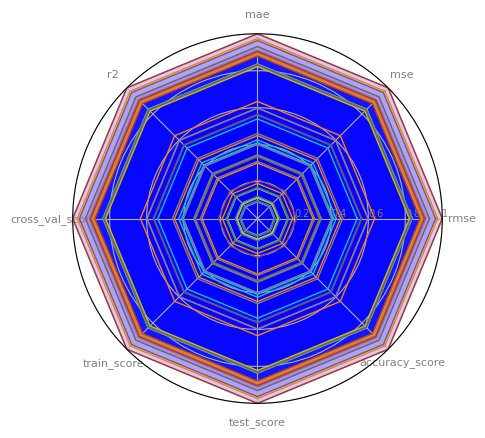

In [115]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
'''
df contains a dictionary of the following format:
model: list of the models (i.e. the names of the models)
cross_val_score: list of the cross_val_score values for each model
rmse: list of the rmse values for each model
mae: list of the mae values for each model
r2: list of the r2 values for each model
mse: list of the mse values for each model
train_score: list of the train_score values for each model
test_score: list of the test_score values for each model
'''

def get_scores(model,metric,df):
    return df[df['model'] == model].iloc[0].values[1:]  # get the scores for the model


df = pd.DataFrame({
    # fill with the data from 'data' dataframe and populate by using the get_scores function for each metric and model. use list comprehension to iterate over the models and metrics and populate the dataframe.
    'model': data['model'], # list of the models (i.e. the names of the models)
    'rmse': [get_scores(model,'rmse',data) for model in data['model']], # list of the rmse values for each model
    'mse': [get_scores(model,'mse',data) for model in data['model']], # list of the mse values for each model
    'mae': [get_scores(model,'mae',data) for model in data['model']], # list of the mae values for each model
    'r2': [get_scores(model,'r2',data) for model in data['model']], # list of the r2 values for each model
    'cross_val_score': [get_scores(model,'cross_val_score',data) for model in data['model']], # list of the cross_val_score values for each model
    'train_score': [get_scores(model,'train_score',data) for model in data['model']], # list of the train_score values for each model
    'test_score': [get_scores(model,'test_score',data) for model in data['model']], # list of the test_score values for each model
    'accuracy_score': [get_scores(model,'accuracy_score',data) for model in data['model']] # list of the accuracy_score values for each model
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('model').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot with the origin at (0,0) and the distance to the outer axis is 1.0 (i.e. the radius of the circle).
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)


# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8,1], ["0.2","0.4","0.6","0.8","1"], color="grey", size=7)
plt.ylim(0,1)

# Plot data (i.e. the scores for each model)
for i in range(len(df)):
    # Ind1
    values=df.loc[i].drop('model').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="model {}".format(i))
    ax.fill(angles, values, 'b', alpha=0.1)



# Show the graph
plt.show()

In [ ]:
# print the metrics list to the console
metrics_list = ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']

In [103]:
# make a radar plot using matplotlib for each model with points for each metric and a line connecting the points for each model (i.e. a radar plot for each model).
# - the radar plot will be a circle with the center at (0, 0) and a radius of 1
# - the radar plot will have 6 spokes (i.e. one for each metric)
# - the radar plot will have a line connecting the points for each model
# - the radar plot will have a point for each metric for each model


# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi


ValueError: num must be 1 <= num <= 4, not 5

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)